## **Parte 1 - ejercicio práctico 5**

Realice un análisis descriptivo completo y actualizado al julio 31 de 2024, incluyendo gráficos, tablas y georreferenciación de la base de datos Accidentalidad_en_Barranquilla.csv. Deben entregar un script .R con los códigos usados.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
accidentes =pd.read_csv("C:/Users/fonta/OneDrive/Documentos/CDD/6. Sexto semestre/Visualizacion de datos/Corte 1/Entrega2/Entrega 2/Accidentalidad_en_Barranquilla_20240830.csv")

In [4]:
accidentes.shape

(25610, 11)

Se tiene un total de 7 variables y 25.610 registros.

In [5]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25610 entries, 0 to 25609
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA_ACCIDENTE                   25610 non-null  object 
 1   HORA_ACCIDENTE                    25610 non-null  object 
 2   GRAVEDAD_ACCIDENTE                25610 non-null  object 
 3   CLASE_ACCIDENTE                   25610 non-null  object 
 4   SITIO_EXACTO_ACCIDENTE            25610 non-null  object 
 5   CANT_HERIDOS_EN _SITIO_ACCIDENTE  9984 non-null   float64
 6   CANT_MUERTOS_EN _SITIO_ACCIDENTE  252 non-null    float64
 7   CANTIDAD_ACCIDENTES               25610 non-null  int64  
 8   AÑO_ACCIDENTE                     25610 non-null  int64  
 9   MES_ACCIDENTE                     25610 non-null  object 
 10  DIA_ACCIDENTE                     25610 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ MB


Con el anterior resumen podemos identificar de una vez cuales son las variables que contienen datos faltantes, mas adelante las analisaremos.

### **Análisis de las variables**

**Fechas de registros**

In [6]:
print("Fecha mínima de registros: ", min(accidentes["FECHA_ACCIDENTE"]))
print("Fecha máxima de registros: ", max(accidentes["FECHA_ACCIDENTE"]))

Fecha mínima de registros:  2018-01-01T00:00:00.000
Fecha máxima de registros:  2024-06-30T00:00:00.000


Como se puede observar, se tienen reistros desde enero de 2018 hasta junio de  2024, para hacer un análisis en las mismas condiciones se trabajará con los datos hasta 2023, puesto que, los datos de 2024 solo son preeliminares.

In [7]:
accidentes = accidentes[accidentes["AÑO_ACCIDENTE"]!= 2024]
accidentes.tail()

,FECHA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE
24864,2023-12-29T00:00:00.000,04:00:00:pm,Con heridos,Choque,CARRERA 6D CALLE 18,1.0,NaN,1,2023,December,Fri
24865,2023-12-29T00:00:00.000,07:35:00:pm,Con heridos,Choque,AVENIDA CIRCUNVALAR CRA 25,1.0,NaN,1,2023,December,Fri
24866,2023-12-29T00:00:00.000,08:30:00:am,Con heridos,Choque,AV CIRCUNVALAR CON CARRERA 43,2.0,NaN,1,2023,December,Fri
24867,2023-12-30T00:00:00.000,04:25:00:pm,Con muertos,Choque,CARRERA 46 CALLE 37,2.0,1.0,1,2023,December,Sat
24868,2023-12-30T00:00:00.000,11:55:00:pm,Con heridos,Choque,CARERRA 8 SUR # 51B-13,1.0,NaN,1,2023,December,Sat


**Gravedad y clase de accidente:**

In [8]:
accidentes.loc[:, "GRAVEDAD_ACCIDENTE"] = accidentes["GRAVEDAD_ACCIDENTE"].astype('category')

print(accidentes["GRAVEDAD_ACCIDENTE"].value_counts())

GRAVEDAD_ACCIDENTE
Solo daños     15455
Con heridos     9179
Con muertos      235
Name: count, dtype: int64


In [9]:
accidentes.loc[:, "CLASE_ACCIDENTE"] = accidentes["CLASE_ACCIDENTE"].astype('category')

print(accidentes["CLASE_ACCIDENTE"].value_counts())

CLASE_ACCIDENTE
Choque            23214
Atropello          1236
Caida Ocupante      181
Otro                120
Volcamiento         105
Incendio             13
Name: count, dtype: int64


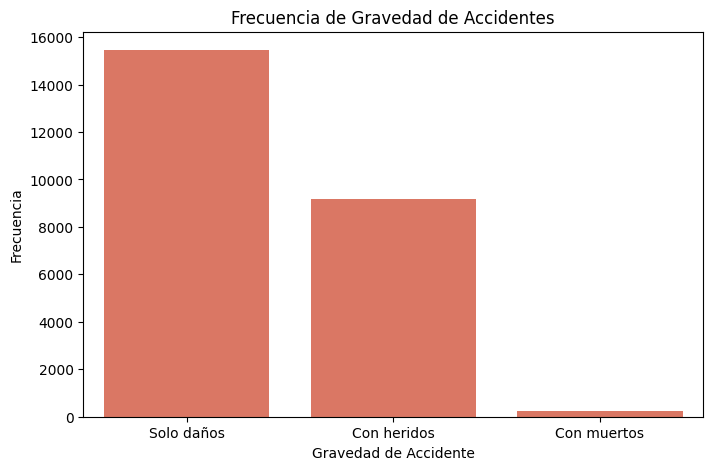

In [13]:
orden = accidentes['GRAVEDAD_ACCIDENTE'].value_counts().index

# Crear el gráfico de barras ordenado
plt.figure(figsize=(8, 5))
sns.countplot(data=accidentes, x='GRAVEDAD_ACCIDENTE', order=orden, color='#EE6A50')
plt.xlabel('Gravedad de Accidente')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Gravedad de Accidentes')
plt.show()

La mayoría de los accidentes registrados desde 2018 hasta 2024 solo presentaron daños, hay muy pocos registros de accidentes con desesos.

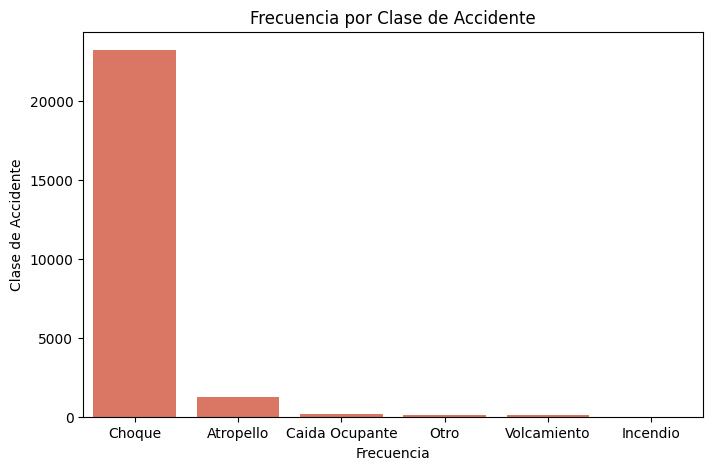

In [16]:
count_acc = accidentes['CLASE_ACCIDENTE'].value_counts().reset_index()
count_acc.columns = ['CLASE_ACCIDENTE', 'n']
count_acc = count_acc.sort_values(by='n', ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(data=count_acc, y='n', x='CLASE_ACCIDENTE', color='#EE6A50')
plt.xlabel('Frecuencia')
plt.ylabel('Clase de Accidente')
plt.title('Frecuencia por Clase de Accidente')
plt.show()

mas del 75% de los registros son de la clase de accidente "choque".

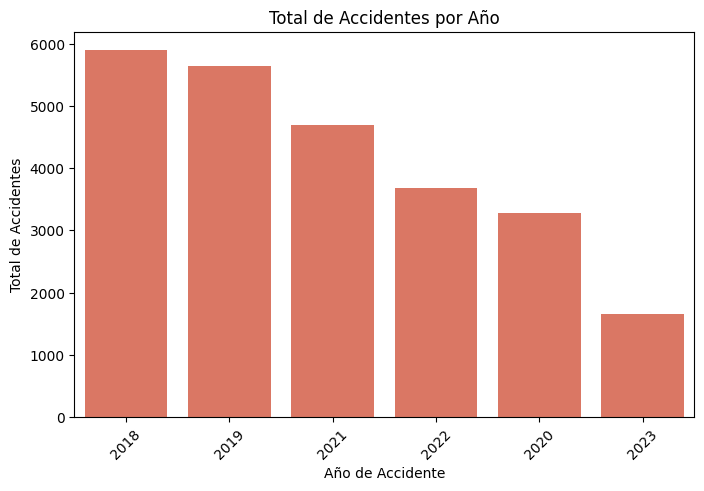

In [19]:
accidentes['AÑO_ACCIDENTE'] = accidentes['AÑO_ACCIDENTE'].astype('category')


acc_años = accidentes.groupby('AÑO_ACCIDENTE', observed=False)['CANTIDAD_ACCIDENTES'].sum().reset_index()
acc_años = acc_años.sort_values(by='CANTIDAD_ACCIDENTES', ascending=False)

orden = acc_años['AÑO_ACCIDENTE']

plt.figure(figsize=(8, 5))
sns.barplot(data=acc_años, x='AÑO_ACCIDENTE', y='CANTIDAD_ACCIDENTES', order=orden, color='#EE6A50')
plt.xlabel('Año de Accidente')
plt.ylabel('Total de Accidentes')
plt.title('Total de Accidentes por Año')
plt.xticks(rotation=45)
plt.show()

El gráfico anterior es muy sutil, ya que nos muestra que al parecer la cantidad de accidentes ha disminuido desde el 2018 hasta el 2023 de manera proporcional en la ciudad de Barranquilla.

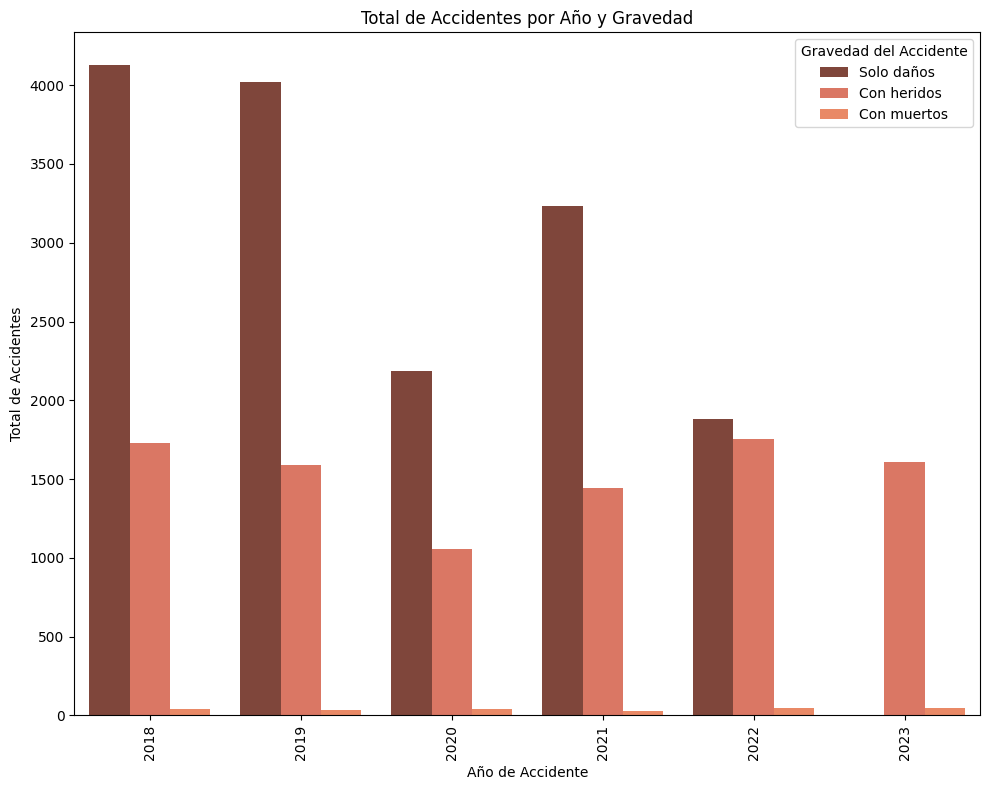

In [21]:
acc_años1 = accidentes.groupby(['AÑO_ACCIDENTE', 'GRAVEDAD_ACCIDENTE'], observed=False)['CANTIDAD_ACCIDENTES'].sum().reset_index()


# Ordenar por 'total_acc' en orden descendente
acc_años1 = acc_años1.sort_values(by='CANTIDAD_ACCIDENTES', ascending=False)

# Crear el diagrama de barras
plt.figure(figsize=(10, 8))
sns.barplot(data=acc_años1, x='AÑO_ACCIDENTE', y='CANTIDAD_ACCIDENTES', hue='GRAVEDAD_ACCIDENTE', palette=["#8B3E2F", "#EE6A50", "#FF7F50"], errorbar=None)
plt.xlabel('Año de Accidente')
plt.ylabel('Total de Accidentes')
plt.title('Total de Accidentes por Año y Gravedad')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.legend(title='Gravedad del Accidente')
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()

En el gráfico anterior se puede notar que la mayoría de los accidentes que se registraron entre 2018 y 2023 solo han presentados daños, mientras que el número de accidentes que solo han tenido heridos se ha mantenido similar durante estos años.
Si nos fijamos en 2023, vemos que al parecer en 2023, no fueron registrados una cantidad considerable de accidentes donde solo fueran solo daños (Ver la tabla siguiente).

In [27]:
acc_años1 

,AÑO_ACCIDENTE,GRAVEDAD_ACCIDENTE,CANTIDAD_ACCIDENTES
2,2018,Solo daños,4129
5,2019,Solo daños,4020
11,2021,Solo daños,3233
8,2020,Solo daños,2189
14,2022,Solo daños,1883
12,2022,Con heridos,1753
0,2018,Con heridos,1731
15,2023,Con heridos,1607
3,2019,Con heridos,1590
9,2021,Con heridos,1441


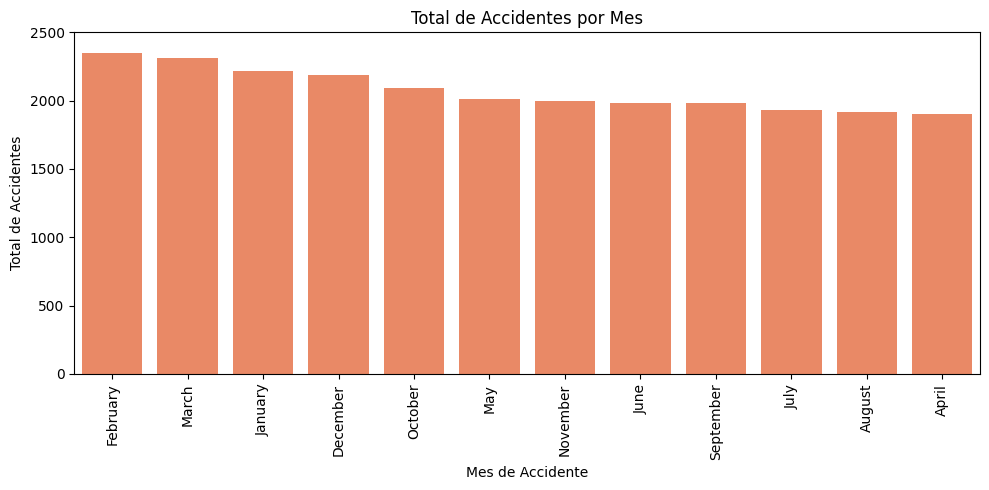

In [34]:
accidentes['MES_ACCIDENTE'] = accidentes['MES_ACCIDENTE'].astype('category')

acc_mes = accidentes.groupby('MES_ACCIDENTE', observed=False)['CANTIDAD_ACCIDENTES'].sum().reset_index()
acc_mes = acc_mes.sort_values(by='CANTIDAD_ACCIDENTES', ascending=False)

orden = acc_mes['MES_ACCIDENTE']

# Crear el gráfico con el orden especificado
plt.figure(figsize=(10, 5))
sns.barplot(data=acc_mes, x='MES_ACCIDENTE', y='CANTIDAD_ACCIDENTES', order=orden, color='#FF7F50')
plt.ylim(0, 2500)
plt.xlabel('Mes de Accidente')
plt.ylabel('Total de Accidentes')
plt.title('Total de Accidentes por Mes')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Según lo que se evidencia en el gráfico anterior podemos ver que la cantidad de los accidentes registrados en cada mes no es muy diferente, los accidentes registrados por mes estan estre 1900 y 2400, siendo febrero con un total de 2.348 y abril con 1.899

In [35]:
acc_mes

,MES_ACCIDENTE,CANTIDAD_ACCIDENTES
3,February,2348
7,March,2309
4,January,2216
2,December,2190
10,October,2090
8,May,2013
9,November,1996
6,June,1983
11,September,1980
5,July,1932


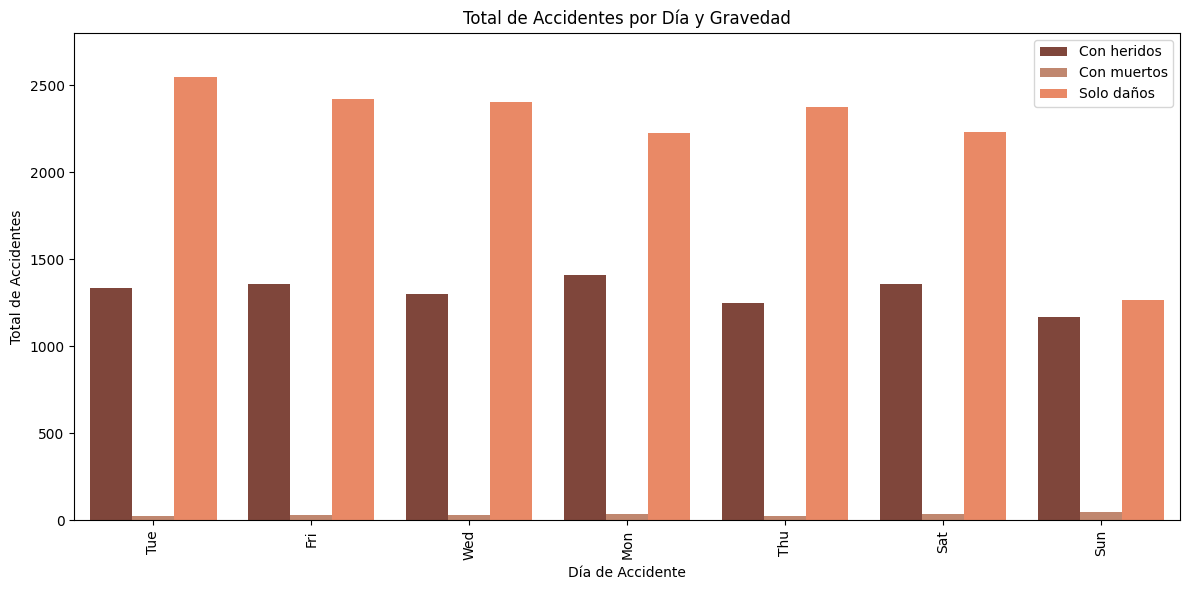

In [50]:
acc_dia_gravedad = accidentes.groupby(['DIA_ACCIDENTE', 'GRAVEDAD_ACCIDENTE'])['CANTIDAD_ACCIDENTES'].sum().reset_index()

acc_dia_total = acc_dia_gravedad.groupby('DIA_ACCIDENTE')['CANTIDAD_ACCIDENTES'].sum().reset_index()
acc_dia_total = acc_dia_total.sort_values(by='CANTIDAD_ACCIDENTES', ascending=False)
orden = acc_dia_total['DIA_ACCIDENTE'].tolist()

plt.figure(figsize=(12, 6))
sns.barplot(data=acc_dia_gravedad, x='DIA_ACCIDENTE', y='CANTIDAD_ACCIDENTES', hue='GRAVEDAD_ACCIDENTE', order =orden , palette=["#8B3E2F", "#CD8162", "#FF7F50"])

plt.ylim(0, 2800)
plt.xlabel('Día de Accidente')
plt.ylabel('Total de Accidentes')
plt.title('Total de Accidentes por Día y Gravedad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper right')

plt.show()

El diagrama anterior nos perimite ver como es la gravedad de accidentes por día, viendo así que se ve la misma tendencia que se veía en las gráficas anteriores, donde la mayor cantidad de accidentes son registrados solo con daños, podemos notar que el sabado es la excepción, parece que el los sabados se registran una cantidad similar de accidentes con muertos y heridos.

### **Análisis de datos faltantes**

In [51]:
accidentes.columns = [
    "fecha", "hora", "gravedad", 
    "clase", "sitio", "no_heridos", 
    "no_muertos", "cantidad", 
    "año", "mes", "dia"
]

Index(['fecha', 'hora', 'gravedad', 'clase', 'sitio', 'no_heridos',
       'no_muertos', 'cantidad', 'año', 'mes', 'dia'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

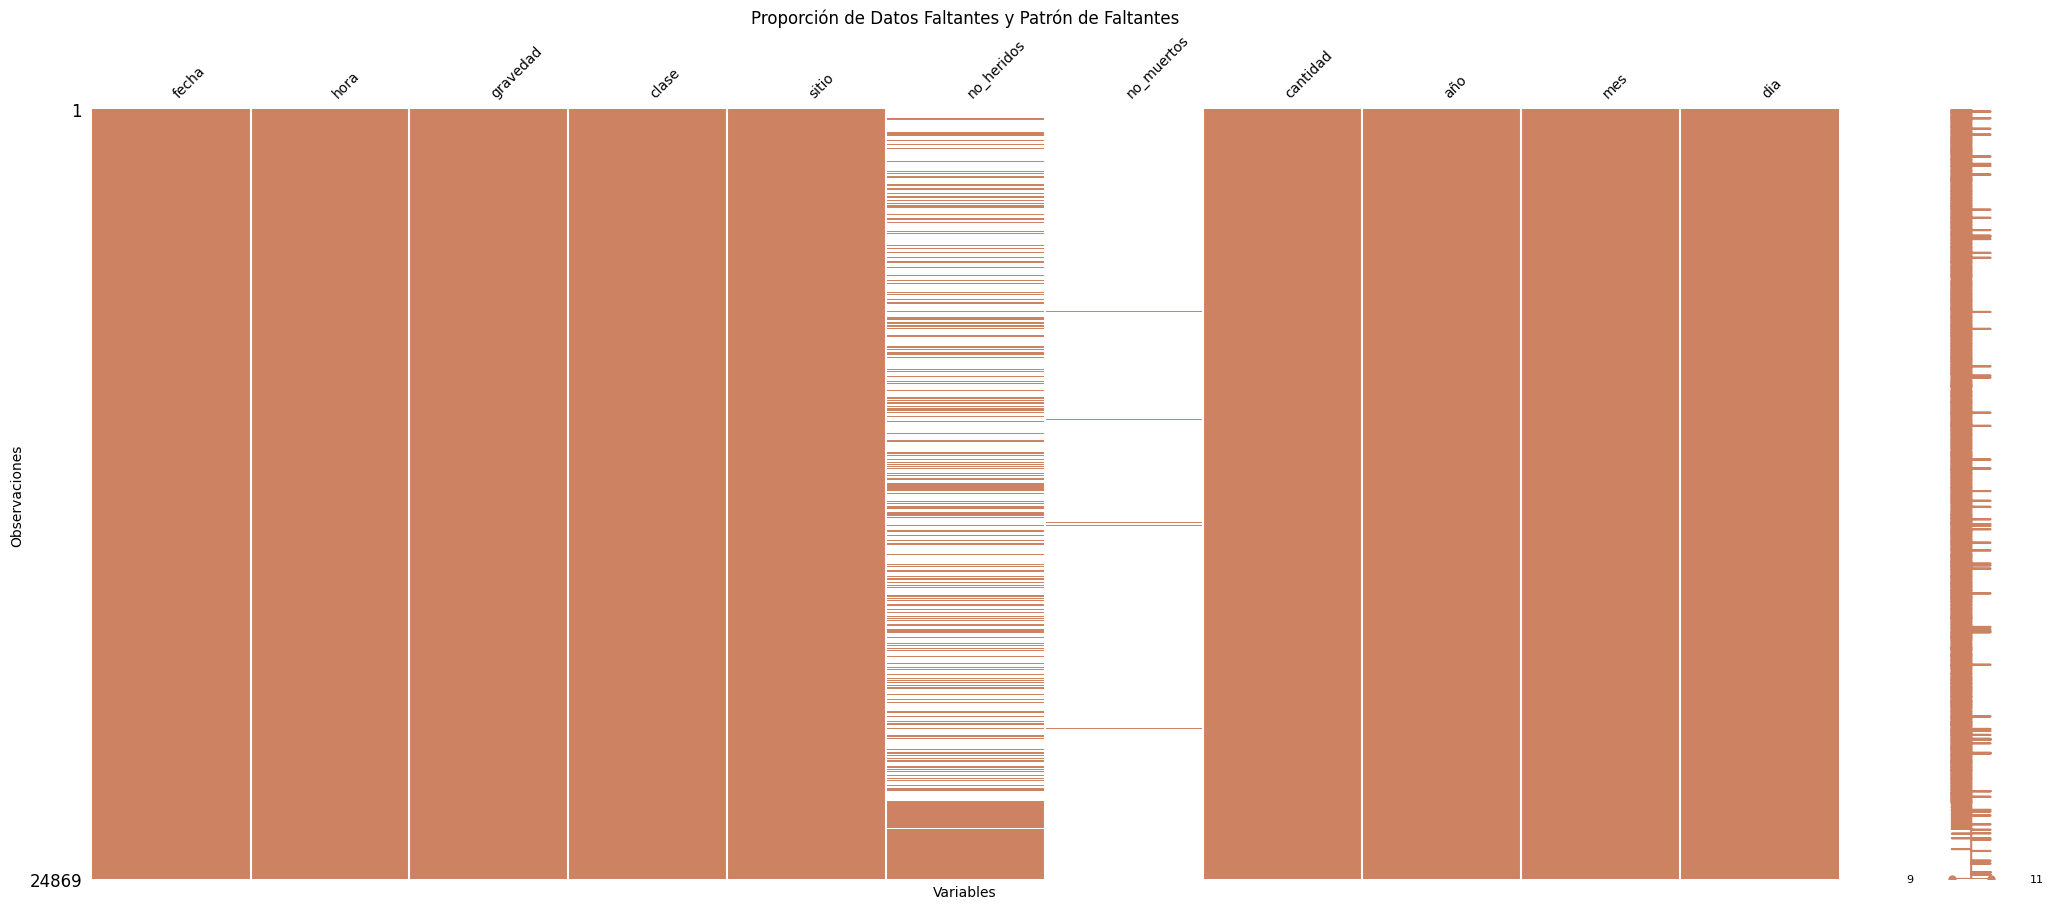

In [62]:
plt.figure(figsize=(10, 8))

# Visualizar el patrón de datos faltantes
msno.matrix(accidentes, 
            color=(0.804, 0.51, 0.384),  # Color para los datos no faltantes
            fontsize=10  # Ajustar el tamaño de la fuente
           )

# Ajustar etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Observaciones')
plt.title('Proporción de Datos Faltantes y Patrón de Faltantes')

plt.show()

Como lo vimos al incio de este análisis los datos faltantes del data set estan en las variables "no_heridos" y "no_muertos", vemos que la variable "no_muertos" esta casi que completamente vacía, por tanto no será posible realizar algun tratamiento en estos datos faltantes.

Analizamos la variable "no_heridos":

In [66]:
print("Datos faltantes: ",accidentes["no_heridos"].isna().sum())

Datos faltantes:  15612


Si estudiamos bien la variable de "no_heridos" llegamos a la conclusión de que esta variable puede ser tomada como una variable numerica factor, puesto que las categrías serían la cantidad de heridos en cada accidente, sería erroneo tratarla como una variable numérica continua.

In [71]:
accidentes["no_heridos"] =accidentes["no_heridos"].astype('category')
print((accidentes["no_heridos"].value_counts()))

no_heridos
1.0     6421
2.0     2106
3.0      443
4.0      147
5.0       52
6.0       29
7.0       13
8.0        9
10.0       7
12.0       7
9.0        6
11.0       5
13.0       2
14.0       1
15.0       1
16.0       1
18.0       1
19.0       1
20.0       1
21.0       1
22.0       1
23.0       1
42.0       1
Name: count, dtype: int64


De esta forma si se puede hacer una mejor interpretación acerca de los registros de los números de heridos registrados en cada accidente.

#### **Fitrado solo por 2023**

In [81]:
accidentes_2023 = accidentes[accidentes["año"]== 2023]
accidentes_2023.head()

,fecha,hora,gravedad,clase,sitio,no_heridos,no_muertos,cantidad,año,mes,dia
23207,2023-01-01T00:00:00.000,07:50:00:am,Con heridos,Choque,CALLE 17 # 7B - 60,1.0,NaN,1,2023,January,Sun
23208,2023-01-01T00:00:00.000,11:10:00:am,Con heridos,Choque,CALLE 76 CARRERA 8,1.0,NaN,1,2023,January,Sun
23209,2023-01-02T00:00:00.000,02:15:00:am,Con heridos,Choque,CALLE 21 CARRERA 23,4.0,NaN,1,2023,January,Mon
23210,2023-01-02T00:00:00.000,07:00:00:pm,Con heridos,Atropello,CALLE 110 CON CRA 34,2.0,NaN,1,2023,January,Mon
23211,2023-01-02T00:00:00.000,09:00:00:pm,Con heridos,Choque,CALLE 51B CON CARRERA 5,2.0,NaN,1,2023,January,Mon


In [82]:
accidentes_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1662 entries, 23207 to 24868
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fecha       1662 non-null   object  
 1   hora        1662 non-null   object  
 2   gravedad    1662 non-null   object  
 3   clase       1662 non-null   object  
 4   sitio       1662 non-null   object  
 5   no_heridos  1622 non-null   category
 6   no_muertos  49 non-null     float64 
 7   cantidad    1662 non-null   int64   
 8   año         1662 non-null   category
 9   mes         1662 non-null   category
 10  dia         1662 non-null   object  
dtypes: category(3), float64(1), int64(1), object(6)
memory usage: 123.1+ KB


In [83]:
print("Datos faltantes: ",accidentes_2023["no_heridos"].isna().sum())

Datos faltantes:  40


Al filtrar el dataset solo para el año 2023, vemos que la cantidad de datos faltantes en la variable "no_heridos" se redujo a solo a 40, se hará una imputación sencilla, se reemplazaran estos valores por la moda de nuetsra variable factor

In [84]:

print((accidentes_2023["no_heridos"].value_counts()))

no_heridos
1.0     1059
2.0      417
3.0       88
4.0       33
5.0        7
6.0        6
7.0        3
12.0       2
8.0        1
11.0       1
10.0       1
15.0       1
23.0       1
21.0       1
18.0       1
14.0       0
13.0       0
9.0        0
16.0       0
20.0       0
19.0       0
22.0       0
42.0       0
Name: count, dtype: int64


In [86]:
moda = accidentes_2023['no_heridos'].mode()[0]
accidentes_2023.loc[:, 'no_heridos'] = accidentes_2023['no_heridos'].fillna(moda)

print("Datos faltantes: ",accidentes_2023["no_heridos"].isna().sum())


Datos faltantes:  0


In [88]:
print((accidentes_2023["no_heridos"].value_counts().head()))

no_heridos
1.0    1099
2.0     417
3.0      88
4.0      33
5.0       7
Name: count, dtype: int64
